In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
%matplotlib inline
mpl.rc('figure', figsize=[12,8])  #set the default figure size

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

In [23]:
class KNNRegressor(sklearn.base.RegressorMixin):
    
    def __init__(self, k,gamma):
        self.k = k
        self.gamma = gamma
        super().__init__()
        
    def fit(self, X,y):
        self.X = X
        self.y = y
        self.nn = NearestNeighbors(n_neighbors=self.k)
        self.nn.fit(X.reshape(-1,1))
        
    def predict(self, T):
        predictions = []
        _, neighbors = self.nn.kneighbors(T)
        regressor = LinearRegression()
        for i in range(T.shape[0]):
            sample_weight = [np.exp(-self.gamma*self.Square_Euclidean(T[i],temp)) for temp in self.X[neighbors[i]]]
            regressor.fit(self.X[neighbors[i]], self.y[neighbors[i]],sample_weight)
            predictions.append(regressor.predict([T[i]]))
        return np.asarray(predictions)
    
    def Square_Euclidean(self,x,y):
        return (sum([(a - b) ** 2 for a, b in zip(x, y)]))

In [18]:
def f_func(x):
        return 3.0 + 4.0 * x - 0.05 * x**2

def generate_data(size=200):
    X = np.sort(np.random.random(size) * 100)
    y = f_func(X) + (np.random.random(size) - 0.5) * 50
    return(X,y)

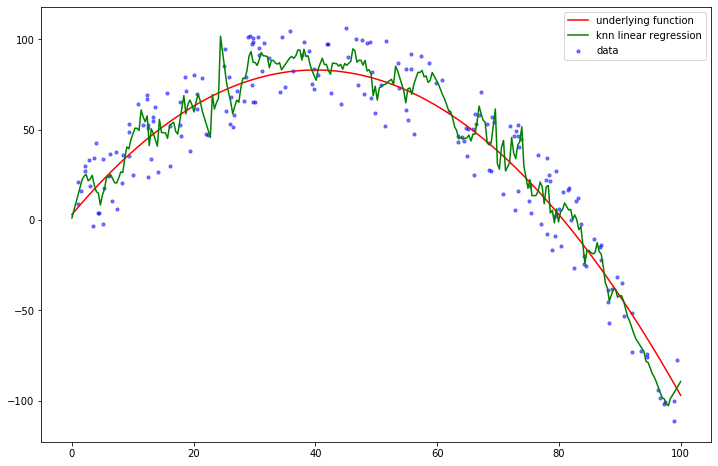

In [26]:
u = np.linspace(0,100,300)
f = f_func(u)
X, y = generate_data()
knn_reg = KNNRegressor(5,1/40)
knn_reg.fit(X.reshape(-1,1), y)
predictions = knn_reg.predict(u.reshape(-1,1))

plt.plot(u,f, 'r', label='underlying function')
plt.scatter(X, y, s=10, color='b', alpha=0.5, label='data')
plt.plot(u,predictions, color='g', label='knn linear regression')
plt.legend()

In [190]:
from sklearn.ensemble import BaggingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('Heart.csv').drop('Unnamed: 0', axis=1)
data= data.dropna(how = 'any')
pd.set_option('display.max_rows', 500)
X = data.loc[:, data.columns].copy().drop('AHD',axis=1)
y = data.loc[:, 'AHD'].copy()
le = LabelEncoder()
## transform y
le.fit(y)
y = (le.transform(y))
## transform X, missing data, NaN
# print(X_new.isna().sum())
# print(pd.isnull(X_new).sum())
enc = OneHotEncoder(drop = 'first')
enc_df = pd.DataFrame(enc.fit_transform(X[['ChestPain','Thal']]).toarray())
temp = X.drop(['ChestPain','Thal'],axis=1)
index = [i for i in range(len(temp))]
enc_df.index = index
temp.index = index
X_final  = pd.concat([enc_df,temp],axis = 1)
## test train split
X_train, X_test, y_train, y_test =train_test_split(X_final, y,stratify = y,test_size = 0.20)
bagging = []
oob_bagging = []
rf = []
oob_rf = []
for number in range(1,300):
    clf_oob = BaggingClassifier(n_estimators=number,oob_score = True,random_state=0).fit(X_train, y_train)
    clf_rf = RandomForestClassifier(max_depth=5,oob_score = True, random_state=0).fit(X_train, y_train)
    bagging.append(1-clf_oob.score(X_test,y_test))
    oob_bagging.append(1-clf_oob.oob_score_)
    rf.append(1-clf_rf.score(X_test,y_test))
    oob_rf.append(1-clf_rf.oob_score_)
              

plt.plot(bagging)
plt.plot(oob_bagging)
plt.plot()
plt.show

NameError: name 'RandomForestClassifier' is not defined

In [7]:
chi_square = 9.34
train_data = pd.DataFrame(np.random.normal(0, 1, 2000))
test_data = pd.DataFrame(np.random.normal(0, 1, 10000))
for i in range(9):
    train_temp = pd.DataFrame(np.random.normal(0, 1, 2000))
    test_temp = pd.DataFrame(np.random.normal(0, 1, 10000))
    train_data = pd.concat([train_data,train_temp],axis = 1)
    test_data =  pd.concat([test_data,test_temp],axis = 1)
sum1 = (train_data*train_data).sum(axis = 1)
y_train = [1 if i>chi_square else -1 for i in sum1]
sum2 = (test_data*test_data).sum(axis = 1)
y_test = [1 if i>chi_square else -1 for i in sum2]

0.923


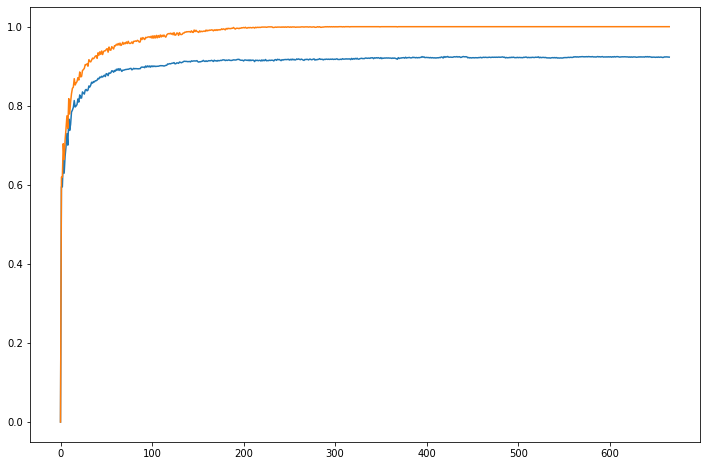

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
test_list = []
train_list = []
for M in range(666):
    W = np.ones(len(train_data)) / len(train_data)
    alpha_list = []
    classifier_list = []
    for m in range(M):
        tree = DecisionTreeClassifier(max_depth=3)
        tree.fit(train_data,y_train, sample_weight=W)
        prob = tree.predict(train_data)
        mask = (prob != y_train)
        err = np.sum(W[mask])/np.sum(W)
        alpha = (np.log(1 - err) - np.log(err))
        W[mask] = W[mask]*np.exp(alpha)
        alpha_list.append(alpha)
        classifier_list.append(tree)
    N = len(test_data)
    N1 = len(train_data)
    result = np.zeros(N)
    result1 = np.zeros(N1)
    for alpha, tree in zip(alpha_list, classifier_list):
        result += alpha*tree.predict(test_data)
        result1 += alpha*tree.predict(train_data)
    result = np.sign(result)
    result1 = np.sign(result1)
    train_error = np.sum(result1 == y_train)/len(y_train)
    test_error = np.sum(result == y_test)/len(y_test)
    test_list.append(test_error)
    train_list.append(train_error)
plt.plot(test_list,label = 'test')
plt.plot(train_list,label = 'train')
print(test_error)
plt.show()

0.8132


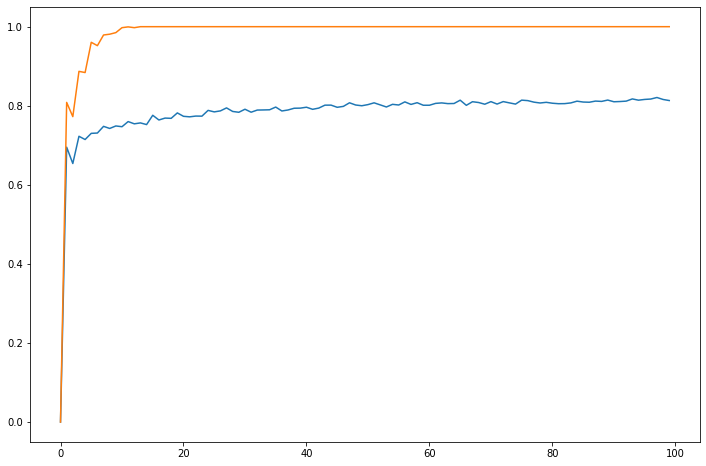

In [13]:
chi_square = 9.34
train_data = pd.DataFrame(np.random.normal(0, 1, 1000))
test_data = pd.DataFrame(np.random.normal(0, 1, 5000))
for i in range(9):
    train_temp = pd.DataFrame(np.random.normal(0, 1, 1000))
    test_temp = pd.DataFrame(np.random.normal(0, 1, 5000))
    train_data = pd.concat([train_data,train_temp],axis = 1)
    test_data =  pd.concat([test_data,test_temp],axis = 1)
sum1 = (train_data*train_data).sum(axis = 1)
y_train = [1 if i>chi_square else -1 for i in sum1]
sum2 = (test_data*test_data).sum(axis = 1)
y_test = [1 if i>chi_square else -1 for i in sum2]

train_data_2 = pd.DataFrame(np.random.normal(0, 1, 1000))
test_data_2 = pd.DataFrame(np.random.normal(0, 1, 5000))
for i in range(9):
    train_temp = pd.DataFrame(np.random.normal(0, 1, 1000))
    test_temp = pd.DataFrame(np.random.normal(0, 1, 5000))
    train_data_2 = pd.concat([train_data_2,train_temp],axis = 1)
    test_data_2 =  pd.concat([test_data_2,test_temp],axis = 1)
sum1 = (train_data_2*train_data_2).sum(axis = 1)
y_train_2 = [1 if i>12 else -1 for i in sum1]
sum2 = (test_data_2*test_data_2).sum(axis = 1)
y_test_2 = [1 if i>12 else -1 for i in sum2]
train_data = pd.concat([train_data,train_data_2],axis = 0)
test_data = pd.concat([test_data,test_data_2],axis = 0)
y_train = y_train+y_train_2
y_test = y_test+(y_test_2)

test_list = []
train_list = []
for M in range(100):
    W = np.ones(len(train_data)) / len(train_data)
    alpha_list = []
    classifier_list = []
    for m in range(M):
        tree = DecisionTreeClassifier(max_depth=8)
        tree.fit(train_data,y_train, sample_weight=W)
        prob = tree.predict(train_data)
        mask = (prob != y_train)
        err = np.sum(W[mask])/np.sum(W)
        alpha = (np.log(1 - err) - np.log(err))
        W[mask] = W[mask]*np.exp(alpha)
        alpha_list.append(alpha)
        classifier_list.append(tree)
    N = len(test_data)
    N1 = len(train_data)
    result = np.zeros(N)
    result1 = np.zeros(N1)
    for alpha, tree in zip(alpha_list, classifier_list):
        result += alpha*tree.predict(test_data)
        result1 += alpha*tree.predict(train_data)
    result = np.sign(result)
    result1 = np.sign(result1)
    train_error = np.sum(result1 == y_train)/len(y_train)
    test_error = np.sum(result == y_test)/len(y_test)
    test_list.append(test_error)
    train_list.append(train_error)
plt.plot(test_list)
plt.plot(train_list)
print(test_error)
plt.show()